In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df = pd.read_csv('dengue-dataset.csv')

In [60]:
df.head()

,data,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima
0,1998-01-01,237,179.2,25.7,20.2,28.1
1,1998-02-01,331,226.3,25.1,20.0,28.0
2,1998-03-01,562,149.1,24.8,22.4,27.2
3,1998-04-01,187,46.4,22.7,18.1,26.0
4,1998-05-01,32,88.3,19.2,15.7,22.9


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   data                  204 non-null    object 
 1   casos-confirmados     204 non-null    int64  
 2   chuva                 196 non-null    float64
 3   temperatura-media     204 non-null    float64
 4   temperatura-mininima  204 non-null    float64
 5   temperatura-maxima    204 non-null    float64
 6   ano                   204 non-null    object 
 7   mes                   204 non-null    object 
 8   dia                   204 non-null    object 
dtypes: float64(4), int64(1), object(4)
memory usage: 14.5+ KB


In [61]:
df.isnull().sum()

data                    0
casos-confirmados       0
chuva                   8
temperatura-media       0
temperatura-mininima    0
temperatura-maxima      0
dtype: int64

In [62]:
df[df['chuva'].isnull()]

,data,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima
18,1999-07-01,1,NaN,19.6,17.1,22.1
19,1999-08-01,3,NaN,19.8,10.8,24.8
53,2002-06-01,50,NaN,20.9,18.7,22.9
79,2004-08-01,0,NaN,19.9,14.7,23.8
115,2007-08-01,17,NaN,20.8,18.0,23.5
126,2008-07-01,8,NaN,19.2,17.1,22.6
151,2010-08-01,10,NaN,19.6,13.5,24.3
175,2012-08-01,12,NaN,20.3,17.5,21.6


In [63]:
df[['ano','mes','dia']] = df['data'].str.split('-', expand = True)

In [71]:
df

,data,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima,ano,mes,dia
0,1998-01-01,237,179.2,25.7,20.2,28.1,1998,01,01
1,1998-02-01,331,226.3,25.1,20.0,28.0,1998,02,01
2,1998-03-01,562,149.1,24.8,22.4,27.2,1998,03,01
3,1998-04-01,187,46.4,22.7,18.1,26.0,1998,04,01
4,1998-05-01,32,88.3,19.2,15.7,22.9,1998,05,01
...,...,...,...,...,...,...,...,...,...
199,2014-08-01,55,12.2,20.6,13.1,24.7,2014,08,01
200,2014-09-01,40,69.2,23.0,18.6,26.8,2014,09,01
201,2014-10-01,40,15.6,24.7,17.2,30.0,2014,10,01
202,2014-11-01,57,154.8,25.0,22.1,28.3,2014,11,01


In [74]:
df.groupby('mes').mean()['chuva]

mes
01    282.570588
02    166.111765
03    142.900000
04     66.317647
05     60.911765
06     45.706250
07     47.386667
08     32.208333
09     54.182353
10    105.635294
11    151.847059
12    206.864706
Name: chuva, dtype: float64

In [89]:
df.loc[[18, 126]] = df.loc[[18, 126]].fillna(47.38)

In [92]:
df.loc[[19, 79, 115, 151, 175]] = df.loc[[19, 79, 115, 151, 175]].fillna(32.20)

In [95]:
df.loc[53] = df.loc[53].fillna(45.70)

In [97]:
df.isnull().sum()

data                    0
casos-confirmados       0
chuva                   0
temperatura-media       0
temperatura-mininima    0
temperatura-maxima      0
ano                     0
mes                     0
dia                     0
dtype: int64

In [98]:
df.loc[[18, 19, 53, 79, 115, 126, 151, 175]]

,data,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima,ano,mes,dia
18,1999-07-01,1,47.38,19.6,17.1,22.1,1999,07,01
19,1999-08-01,3,32.20,19.8,10.8,24.8,1999,08,01
53,2002-06-01,50,45.70,20.9,18.7,22.9,2002,06,01
79,2004-08-01,0,32.20,19.9,14.7,23.8,2004,08,01
115,2007-08-01,17,32.20,20.8,18.0,23.5,2007,08,01
126,2008-07-01,8,47.38,19.2,17.1,22.6,2008,07,01
151,2010-08-01,10,32.20,19.6,13.5,24.3,2010,08,01
175,2012-08-01,12,32.20,20.3,17.5,21.6,2012,08,01


In [101]:
df[['ano', 'mes', 'dia']] = df[['ano', 'mes', 'dia']].apply(pd.to_numeric)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   data                  204 non-null    object 
 1   casos-confirmados     204 non-null    int64  
 2   chuva                 204 non-null    float64
 3   temperatura-media     204 non-null    float64
 4   temperatura-mininima  204 non-null    float64
 5   temperatura-maxima    204 non-null    float64
 6   ano                   204 non-null    int64  
 7   mes                   204 non-null    int64  
 8   dia                   204 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 14.5+ KB


In [106]:
df.describe()

,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima,ano,mes,dia
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.0
mean,357.539216,113.553235,22.200980,17.679412,25.565196,2006.000000,6.500000,1.0
std,1741.814759,95.957159,2.399363,3.336316,2.249864,4.911031,3.460545,0.0
min,0.000000,0.800000,16.400000,8.200000,19.100000,1998.000000,1.000000,1.0
25%,6.000000,40.125000,20.100000,15.075000,23.800000,2002.000000,3.750000,1.0
50%,17.500000,83.450000,22.700000,18.150000,26.200000,2006.000000,6.500000,1.0
75%,84.500000,176.425000,24.225000,20.400000,27.200000,2010.000000,9.250000,1.0
max,20428.000000,452.800000,27.200000,23.500000,30.100000,2014.000000,12.000000,1.0


In [171]:
df = df.drop(df[df['casos-confirmados'] > 5580].index)

In [173]:
df.groupby('mes').mean()['casos-confirmados']

mes
1      84.294118
2     271.764706
3     504.437500
4     667.125000
5     360.187500
6     142.411765
7      21.529412
8      11.176471
9      10.000000
10     11.588235
11     12.588235
12     20.705882
Name: casos-confirmados, dtype: float64

<AxesSubplot:xlabel='mes', ylabel='casos-confirmados'>

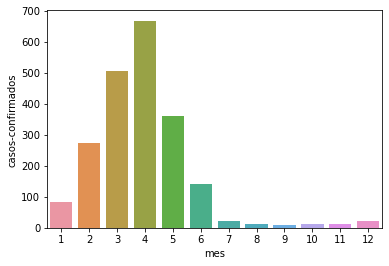

In [198]:
sns.barplot(x='mes',y='casos-confirmados',data=df,estimator=np.mean,ci=False)

<AxesSubplot:xlabel='mes', ylabel='chuva'>

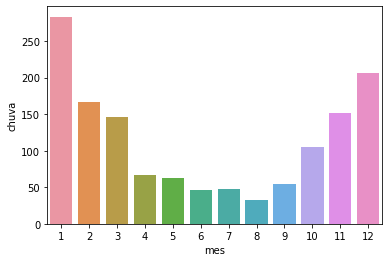

In [210]:
sns.barplot(x='mes',y='chuva',data=df,estimator=np.mean,ci=False)

<AxesSubplot:xlabel='mes', ylabel='temperatura-media'>

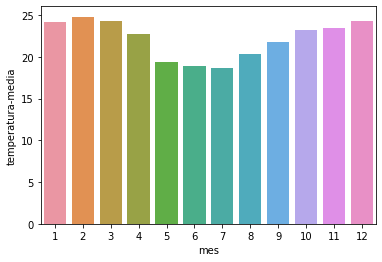

In [207]:
sns.barplot(x='mes',y='temperatura-media',data=df,estimator=np.mean,ci=False)

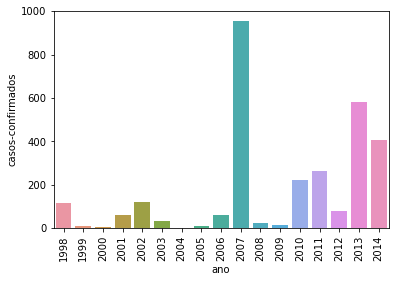

In [315]:
sns.barplot(x='ano',y='casos-confirmados',data=df,estimator=np.mean,ci=False)
plt.xticks(rotation = 90);

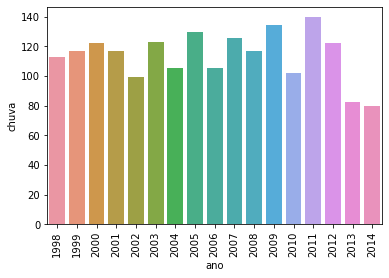

In [314]:
sns.barplot(x='ano',y='chuva',data=df,estimator=np.mean,ci=False)
plt.xticks(rotation = 90);

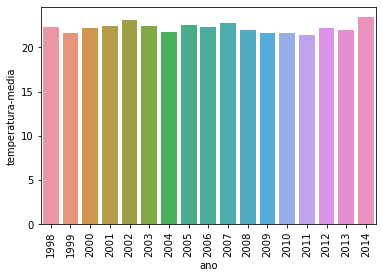

In [316]:
sns.barplot(x='ano',y='temperatura-media',data=df,estimator=np.mean,ci=False)
plt.xticks(rotation = 90);

In [211]:
def risco(casos):
    if casos<100:
        return 'baixo risco'
    elif casos<200 :
        return 'medio risco'
    else:
        return 'alto risco'
   

In [212]:
df['risco']=df['casos-confirmados'].apply(risco)

In [213]:
df.head()

,data,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima,ano,mes,dia,risco
0,1998-01-01,237,179.2,25.7,20.2,28.1,1998,1,1,alto risco
1,1998-02-01,331,226.3,25.1,20.0,28.0,1998,2,1,alto risco
2,1998-03-01,562,149.1,24.8,22.4,27.2,1998,3,1,alto risco
3,1998-04-01,187,46.4,22.7,18.1,26.0,1998,4,1,medio risco
4,1998-05-01,32,88.3,19.2,15.7,22.9,1998,5,1,baixo risco


In [214]:
df['risco'].value_counts()

baixo risco    157
alto risco      32
medio risco     12
Name: risco, dtype: int64

In [216]:
X = df.drop(['data', 'risco','ano'], axis=1)

In [217]:
y = df['risco']

In [218]:
from sklearn.preprocessing import StandardScaler

In [219]:
scaler = StandardScaler()

In [221]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [302]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [303]:
X_train = scaler.fit_transform(X_train)

In [304]:
X_test = scaler.transform(X_test)

In [305]:
param_grid = {'C':[0.01,0.1,1,2,3,4,5], 'kernel':['linear', 'rbf']}

In [306]:
svm = SVC(class_weight='balanced')

In [307]:
svm_model=GridSearchCV(svm, param_grid)

In [308]:
svm_model.fit(X_train, y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.01, 0.1, 1, 2, 3, 4, 5],
                         'kernel': ['linear', 'rbf']})

In [309]:
y_pred = svm_model.predict(X_test)

In [310]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [311]:
confusion_matrix(y_test, y_pred)

array([[ 8,  0,  0],
       [ 0, 69,  0],
       [ 1,  0,  3]], dtype=int64)

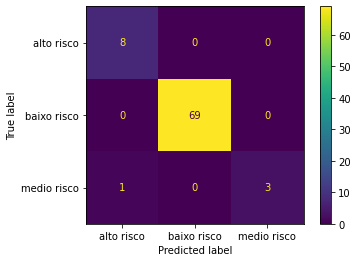

In [312]:
plot_confusion_matrix(svm_model, X_test, y_test)

In [313]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  alto risco       0.89      1.00      0.94         8
 baixo risco       1.00      1.00      1.00        69
 medio risco       1.00      0.75      0.86         4

    accuracy                           0.99        81
   macro avg       0.96      0.92      0.93        81
weighted avg       0.99      0.99      0.99        81

